# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Salma Nadhira Danuningart
- **Email:** salma.danuningrat
- **ID Dicoding:** nyama22

## Menentukan Pertanyaan Bisnis

- Pada kuartil tahun berapa AQI (PM2.5, PM10, SO2) mengalami lonjakkan terbesar?
- Apakah terdapat korelasi antara kadar SO2 dengan hujan?

## Import Semua Packages/Library yang Digunakan

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Pada tahap gathering data, fungsi `read_csv` dengan input parameter link sumber dataset dijalankan dan dimasukkan ke variabel `huairou_df` untuk dibikin data frame. `huairou_df` adalah data frame utama yang akan digunakan selama proses analysis. `huairou_df` adalah dataset berupa nilai-nilai per jam untuk beberapa parameter AQI yang diambil dari stasiun Huairou, Beijing

In [97]:
huairou_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv")
huairou_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


### Assessing Data

Pada tahap assessing data, yang dilakukan pertama kali adalah mengecek adanya missing values.
`huairou_df.info()` dijalankan untuk melihat summary dari data set. Setelah dijalankan, ternyata terdapat beberapa kolom yang memiliki null values. Hal ini dapat dilihat dari output 35064 entries, tidak semua kolom memiliki jumlah entries yang sama.  
Untuk melihat total null values dari setiap kolom, dijalankan `huairou_df.isna().sum()`.  
Lalu untuk melihat jumlah duplikasi, `huairou_df.duplicated().sum()`. Tidak ada duplikasi.  
Terakhir, dijalankan `huairou_df.describe()` untuk menampilkan beberapa parameter statistik untuk setiap kolom

In [98]:
# Mengecek missing values
huairou_df.info()
# Terlihat ada beberapa kolom yang memiliki nilai null
# Columns number 5-16, untuk mengecek lebih lanjut, jalankan:
print("Jumlah null values untuk setiap kolom:")
huairou_df.isna().sum()
print("Jumlah duplikasi: ", huairou_df.duplicated().sum())
# Tampilkan beberapa parameter statistik:
huairou_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah null values untuk setiap kolom:
Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34111.000000,34287.000000,34084.000000,33425.000000,33642.000000,33913.000000,35013.000000,35011.000000,35011.000000,35009.000000,35015.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.067940,1.652021
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.224916,83.289578,18.896912,26.489531,898.738241,54.605746,11.751103,10.022101,14.052541,0.849046,1.199143
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,28.000000,2.000000,12.000000,400.000000,18.000000,2.100000,999.300000,-9.600000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.600000,1007.300000,2.700000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,83.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000


### Cleaning Data

Meskipun kita tidak memiliki duplicate data, jika kita memilikinya kita dapat menjalankan `huairou_df.drop_duplicates(inplace=True)`.  
Dikarenakan pada tahap assessing data terdapat beberapa kolom yang memiliki null values, namun jumlah keseluruh data masih tergolong banyak, dari beberapa cara untuk menangani missing values (dropping, imputation, interpolation), dipilih metode dropping untuk menghilangkan rows dengan null value. Untuk melakukan ini dijalankannya `huairou_df.dropna(inplace=True)`.  
Untuk memastikan hilangnya kolom dengan missing values, `jalankan huairou_df.isna().sum()`.  
Maka didapatkan jumlah total data sebanyak 31708.

In [99]:
# Menangani duplicates jika terdapat duplicates (tapi duplicates kita 0)
huairou_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", huairou_df.duplicated().sum())
# Karena pada beberapa kolom terdapat missing values, namun jumlah dari
# dataset keseluruhan masih relatif banyak, kolom dengan missing values
# akan didrop saja
huairou_df.dropna(inplace=True)
huairou_df.describe()
# Memastikan hilangnya kolom dengan missing values
huairou_df.isna().sum()
# Maka jumlah total data adalah sebanyak 31708

Jumlah duplikasi:  0


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore ...

Pada tahap explore, dilakukan beberapa exploratory data analysis untuk kemudian bisa digunakan untuk menjawab pertanyaan bisnis.
Pertama, seluruh parameter AQI ditampilkan berdasarkan rata-ratanya pertahun (`by="year"`).

In [100]:
# Melihat data AQI berdasarkan tahun
huairou_df.groupby(by="year").agg({
    "No": "nunique",
    "PM2.5": ["max", "min", "mean"],
    "PM10": ["max", "min", "mean"],
    "SO2": ["max", "min", "mean"],
    "NO2": ["max", "min", "mean"],
    "CO": ["max", "min", "mean"],
    "O3": ["max", "min", "mean"],
})

No  PM2.5                   PM10                     SO2       \
     nunique    max  min       mean    max  min        mean    max  min   
year                                                                      
2013    6131  534.0  3.0  71.589300  887.0  3.0   98.433698  196.0  1.0   
2014    8060  528.0  3.0  76.980720  993.0  3.0  100.198586  315.0  1.0   
2015    8107  659.0  3.0  71.188282  991.0  3.0   90.461231  314.0  2.0   
2016    8076  683.0  3.0  61.124690  973.0  3.0   82.569465  184.0  2.0   
2017    1334  558.0  2.0  73.817841  750.0  3.0   91.836582   77.0  1.0   

                   NO2                       CO                         O3  \
           mean    max  min       mean      max    min         mean    max   
year                                                                         
2013  17.821236  231.0  2.0  36.383950   8000.0  100.0  1025.719295  444.0   
2014  17.568970  219.0  2.0  37.455583   6700.0  100.0  1064.454094  391.0   
2015   8.799790  162.0  2.0  28.879660  10000.0  100.0  1056.691748  413.0   
2016   6.701213  189.0  2.0  27.689946   9300.0  100.0   934.534423  356.0   
2017   9.681409  174.0  2.0  39.010495   9800.0  100.0  1314.242879  119.0   

                         
         min       mean  
year                     
2013  0.2142  59.295027  
2014  1.0000  66.819318  
2015  2.0000  60.532096  
2016  2.0000  54.227216  
2017  1.0000  47.155922

Selanjutnya, agar dapat lebih mudah melakukan eksplorasi data, data dibagi menjadi kuartil per tahun. Beberapa pertimbangan dibuatkannya pembagian kuartil:
- Adanya beberapa parameter yang berkaitan dengan musim (temp, rain, dll)
- Kota Huairou merupakan kota 4 musim sehingga cocok untuk dibagi menjadi 4 kuartil berdasarkan musimnya
- Nilai per kuartil diambil dari rata-rata seluruh row data (hourly) selama kuartil tersebut
Pada kode berikut, setelah dibuatkan kolom baru dari `huairou_df`, dibuatkan data frame baru bernama `quarter_pm25_df` yang berisi data `.mean()` PM2.5 selama setiap quarter. 

In [101]:
# Melihat data PM2.5 berdasarkan tahun (dibuat setiap kuartil)
huairou_df['quarter'] = pd.cut(huairou_df['month'], bins=[0, 3, 6, 9, 12], labels=['Q1', 'Q2', 'Q3', 'Q4'], right=False)
quarter_pm25_df = huairou_df.groupby(['year', 'quarter'])['PM2.5'].mean()
print(quarter_pm25_df)

year  quarter
2013  Q1                NaN
      Q2          82.079758
      Q3          71.187289
      Q4          66.903704
2014  Q1         113.376190
      Q2          75.857020
      Q3          67.908342
      Q4          74.996770
2015  Q1          79.922748
      Q2          68.901810
      Q3          49.479466
      Q4          69.007996
2016  Q1          49.540359
      Q2          62.213139
      Q3          48.872238
      Q4          70.118407
2017  Q1          73.817841
      Q2                NaN
      Q3                NaN
      Q4                NaN
Name: PM2.5, dtype: float64


/var/folders/yz/d10v6srd14b8wkvpxfd2br140000gp/T/ipykernel_14388/3758229062.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quarter_pm25_df = huairou_df.groupby(['year', 'quarter'])['PM2.5'].mean()


Dari output cell sebelumnya, nilai mean PM2.5 tertinggi terjadi pada 2014 Q1. Maka untuk eksplorasi lebih lanjut, dilihat data maksimum, minimum, dan mean PM2.5 per bulan selama tahun 2014. Lalu, menggunakan `sort_values()`, diurutkan data dari bulan dengan mean terbesar sampai bulan dengan mean terkecil.

In [102]:
# Explorasi data AQI (PM2.5) per bulan pada tahun 2014
huairou_2014_df = huairou_df[huairou_df['year'] == 2014]
huairou_2014_df.groupby(by="month").agg({
    "No": "nunique",
    "PM2.5": ["max", "min", "mean"],
}).sort_values(by=('PM2.5', 'mean'), ascending=False)

No  PM2.5                 
      nunique    max  min        mean
month                                
2         561  528.0  3.0  144.563280
7         694  384.0  3.0   97.158934
10        726  377.0  3.0   96.563361
3         728  383.0  3.0   89.182692
1         699  392.0  3.0   88.346209
4         705  288.0  3.0   84.878014
11        711  331.0  3.0   67.564979
9         668  233.0  3.0   59.467814
8         658  190.0  3.0   56.387386
5         661  291.0  3.0   51.559153
6         566  220.0  3.0   45.436396
12        683  294.0  3.0   44.874963

Selain PM2.5, nilai PM10 juga diterapkan eksplorasi yang sama untuk melihat maksimum, minimum, dan mean data PM10 per bulan pada tahun 2014

In [103]:
# Explorasi data AQI (PM10) per bulan pada tahun 2014
huairou_2014_df = huairou_df[huairou_df['year'] == 2014]
huairou_2014_df.groupby(by="month").agg({
    "No": "nunique",
    "PM10": ["max", "min", "mean"],
}).sort_values(by=('PM10', 'mean'), ascending=False)

No   PM10                 
      nunique    max  min        mean
month                                
2         561  525.0  5.0  140.376114
4         705  521.0  5.0  129.791489
3         728  449.0  5.0  118.615385
7         694  640.0  5.0  116.879395
10        726  377.0  3.0  115.947658
1         699  440.0  6.0  104.806867
11        711  993.0  5.0   94.363150
5         661  453.0  5.0   91.956127
8         658  213.0  5.0   75.739210
9         668  233.0  5.0   75.220808
12        683  948.0  5.0   68.746999
6         566  253.0  5.0   66.305654

Jika pada code cell sebelumnya data di `groupby()` dengan bulan saya pada tahun tertentu, selanjutnya `groupby()` dilakukan dengan tahun dan bulan, lalu diurutkan dari mean terbesar hingga terkecil. 

In [104]:
# Melihat data PM2.5 dan curah hujan setiap tahun dan bulan
# Diurutkan berdasarkan tingginya PM2.5
huairou_df.groupby(by=["year", "month"]).agg({
    "No": "nunique",
    "PM2.5": ["mean"],
    "RAIN": ["mean"],
}).sort_values(by=('PM2.5', 'mean'), ascending=False)


No       PM2.5      RAIN
           nunique        mean      mean
year month                              
2014 2         561  144.563280  0.007843
2015 12        709  129.404795  0.002962
2013 3         641  100.803432  0.020281
2015 11        668   98.134731  0.063323
2014 7         694   97.158934  0.178818
     10        726   96.563361  0.035399
2016 12        667   93.176912  0.000000
2014 3         728   89.182692  0.006731
     1         699   88.346209  0.000000
2017 1         690   88.259420  0.001449
2015 3         656   85.400457  0.000000
2013 6         566   85.321555  0.207774
2014 4         705   84.878014  0.020000
2016 3         702   83.591168  0.000000
     11        668   82.642216  0.019012
2015 1         707   82.257426  0.001414
2016 10        672   79.166667  0.080060
2015 2         625   77.281760  0.009120
2013 10        690   75.047826  0.017971
     5         471   72.949045  0.008068
     7         528   72.727273  0.270644
2015 4         667   70.210645  0.041529
2013 9         677   68.008863  0.055835
     4         543   67.896869  0.021915
2014 11        711   67.564979  0.000141
2015 10        657   66.382040  0.011872
2013 12        673   60.952452  0.000000
2014 9         668   59.467814  0.129491
2016 1         700   59.278571  0.001571
     7         703   58.786629  0.315932
2015 6         605   58.419835  0.133554
2017 2         644   58.344720  0.007143
2013 8         684   58.302632  0.108772
     11        658   57.226444  0.000000
2014 8         658   56.387386  0.026596
2016 4         642   55.626168  0.017757
2015 5         721   52.679750  0.053121
     7         710   52.477465  0.418169
2014 5         661   51.559153  0.063994
2016 5         711   47.053446  0.051899
     6         675   46.722963  0.218667
     9         594   45.797980  0.122391
2014 6         566   45.436396  0.136749
     12        683   44.874963  0.014934
2015 9         676   42.778107  0.100740
2016 8         704   41.032670  0.073864
     2         638   38.855799  0.014734
2015 8         706   38.803116  0.147875

Karena pada pertanyaan bisnis kita akan membandingkan PM2.5 dan curah hujan untuk melihat ada tidaknya korelasi antara keduanya, kolom RAIN ditambahkan dalam `groupby()`lalu diurutkan dari curah hujan tertinggi hingga terrendah. Pada data frame yang dihasilkan, terlihat jelas bahwa hujan tertinggi terjadi pada bulan-bulan kemarau seperti Juni, Juli, Agustus, September.

In [105]:
# Melihat data PM2.5 dan curah hujan setiap tahun dan bulan
# Diurutkan berdasarkan tingginya curah hujan
huairou_df.groupby(by=["year", "month"]).agg({
    "No": "nunique",
    "PM2.5": ["mean"],
    "RAIN": ["mean"],
}).sort_values(by=('RAIN', 'mean'), ascending=False)

# Dapat dilihat bahwa hujan tertinggi terjadi pada bulan-bulan
# kemarau (bulan Juni, Juli, Agustus, September)

,,No,PM2.5,RAIN
,,nunique,mean,mean
year,month,,,
2015,7,710,52.477465,0.418169
2016,7,703,58.786629,0.315932
2013,7,528,72.727273,0.270644
2016,6,675,46.722963,0.218667
2013,6,566,85.321555,0.207774
2014,7,694,97.158934,0.178818
2015,8,706,38.803116,0.147875
2014,6,566,45.436396,0.136749


## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada kuartil tahun berapa AQI (PM2.5, PM10, SO2) mengalami lonjakkan terbesar?

Terakhir, pada tahap visualisasi, kita akan menjawab kedua pertanyaan bisnis yang dibuat pada awal proyek. Pertama, dibuatkan line chart menggunakan fungsi `plt.plot()` dengan mengambil nilai X-Axis (`x_labels`) dari seluruh quarter yang memiliki data.  
Karena pengambilan data baru dimulai dari bulan ketiga tahun 2013, perhitungan dimulai dari 2013 Q2 sampai 2017 Q1.  
`has_data_quarter` adalah data frame yang berasal dari data frame `quarter_pm25_df` lalu dihilangkan null values.  
Perlakuan tersebut diterapkan pada parameter PM2.5, PM10 dan SO2

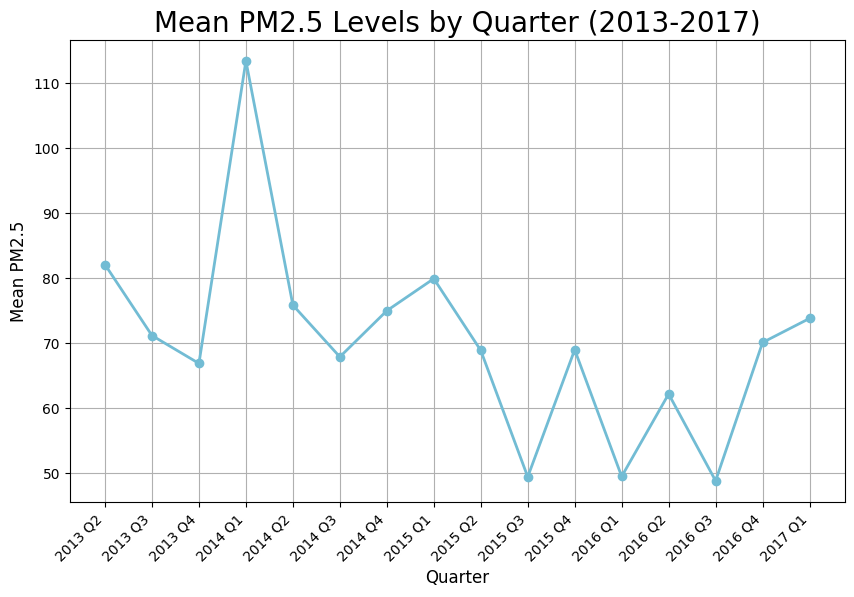

In [106]:
# PM2.5
# Hapus 2013 Q1, dan 2017 Q2 Q3 dan Q4 karena tidak memiliki value
has_data_quarter = quarter_pm25_df.dropna()
years = has_data_quarter.index.get_level_values('year').unique()
quarters = ['Q1', 'Q2', 'Q3', 'Q4'] 

# Memastikan x labels hanya berupa label yang ada (menghilangan nilai yang NA)
x_labels = [f"{year} {quarter}" for year in years for quarter in quarters if (year, quarter) in has_data_quarter.index]

plt.figure(figsize=(10, 6))
plt.plot(
    x_labels, 
    has_data_quarter.values.flatten(), 
    marker='o', 
    linewidth=2, 
    color="#72BCD4")

plt.title('Mean PM2.5 Levels by Quarter (2013-2017)', fontsize=20, loc='center')
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Mean PM2.5', fontsize=12)
plt.xticks(range(len(x_labels)), x_labels, rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()

/var/folders/yz/d10v6srd14b8wkvpxfd2br140000gp/T/ipykernel_14388/2824237517.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quarter_pm10_df = huairou_df.groupby(['year', 'quarter'])['PM10'].mean()


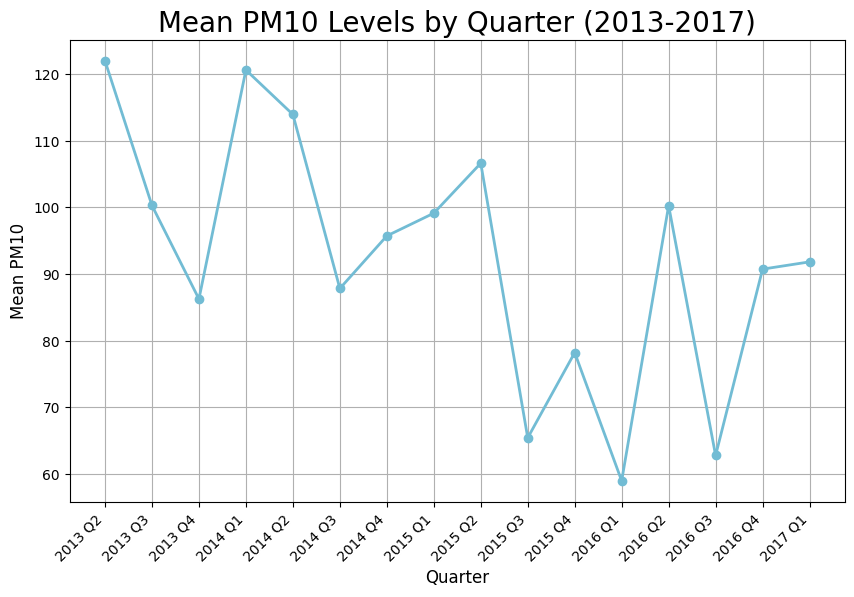

In [107]:
# PM10
quarter_pm10_df = huairou_df.groupby(['year', 'quarter'])['PM10'].mean()

# Hapus 2013 Q1, dan 2017 Q2 Q3 dan Q4 karena tidak memiliki value
has_data_quarter = quarter_pm10_df.dropna()
years = has_data_quarter.index.get_level_values('year').unique()
quarters = ['Q1', 'Q2', 'Q3', 'Q4'] 
# Memastikan x labels hanya berupa label yang ada (menghilangan nilai yang NA)
x_labels = [f"{year} {quarter}" for year in years for quarter in quarters if (year, quarter) in has_data_quarter.index]

plt.figure(figsize=(10, 6))
plt.plot(
    x_labels, 
    has_data_quarter.values.flatten(), 
    marker='o', 
    linewidth=2, 
    color="#72BCD4")

plt.title('Mean PM10 Levels by Quarter (2013-2017)', fontsize=20, loc='center')
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Mean PM10', fontsize=12)
plt.xticks(range(len(x_labels)), x_labels, rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()

/var/folders/yz/d10v6srd14b8wkvpxfd2br140000gp/T/ipykernel_14388/1441712444.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quarter_so2_df = huairou_df.groupby(['year', 'quarter'])['SO2'].mean()


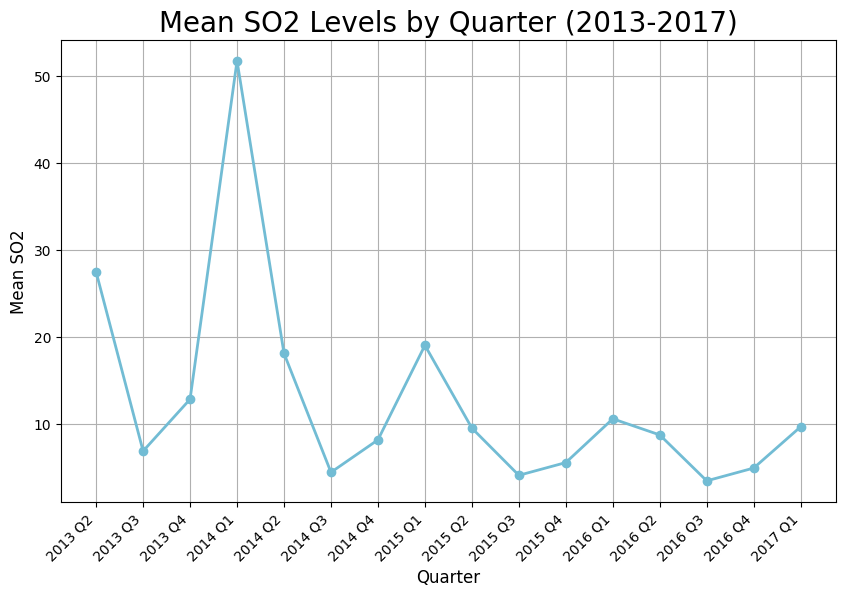

In [108]:
# PM SO2
quarter_so2_df = huairou_df.groupby(['year', 'quarter'])['SO2'].mean()

# Hapus 2013 Q1, dan 2017 Q2 Q3 dan Q4 karena tidak memiliki value
has_data_quarter = quarter_so2_df.dropna()
years = has_data_quarter.index.get_level_values('year').unique()
quarters = ['Q1', 'Q2', 'Q3', 'Q4'] 

# Memastikan x labels hanya berupa label yang ada (menghilangan nilai yang NA)
x_labels = [f"{year} {quarter}" for year in years for quarter in quarters if (year, quarter) in has_data_quarter.index]

plt.figure(figsize=(10, 6))
plt.plot(
    x_labels, 
    has_data_quarter.values.flatten(), 
    marker='o', 
    linewidth=2, 
    color="#72BCD4")

plt.title('Mean SO2 Levels by Quarter (2013-2017)', fontsize=20, loc='center')
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Mean SO2', fontsize=12)
plt.xticks(range(len(x_labels)), x_labels, rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()


### Pertanyaan 2: Apakah terdapat korelasi antara kadar SO2 dengan hujan?

Untuk melakukan perbandingan antara kadar SO2 dengan hujan, tapi plot SO2 sebelumnya yang sudah dibuat, kita tambahkan garis untuk kadar hujan, yang tersimpan dalam `x_labels_rain`. Namun, dikarenakan nilai curah hujan sangat kecil satuannya dibandingkan dengan SO2 sehingga sangat sulit untuk melihat korelasinya pada grafik yang sama, seluruh nilai curah hujan dikali 10 untuk kepentingan perbandingan. 
Maka perlu ditekankan bahwa nilai-nilai curah hujan pada grafik berikut **bukanlah nilai-nilai asli curah hujan** 

/var/folders/yz/d10v6srd14b8wkvpxfd2br140000gp/T/ipykernel_14388/2775009704.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quarter_so2_df = huairou_df.groupby(['year', 'quarter'])['SO2'].mean()
/var/folders/yz/d10v6srd14b8wkvpxfd2br140000gp/T/ipykernel_14388/2775009704.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quarter_rain_df = huairou_df_copy.groupby(['year', 'quarter'])['RAIN'].mean()


<Figure size 1000x800 with 0 Axes>

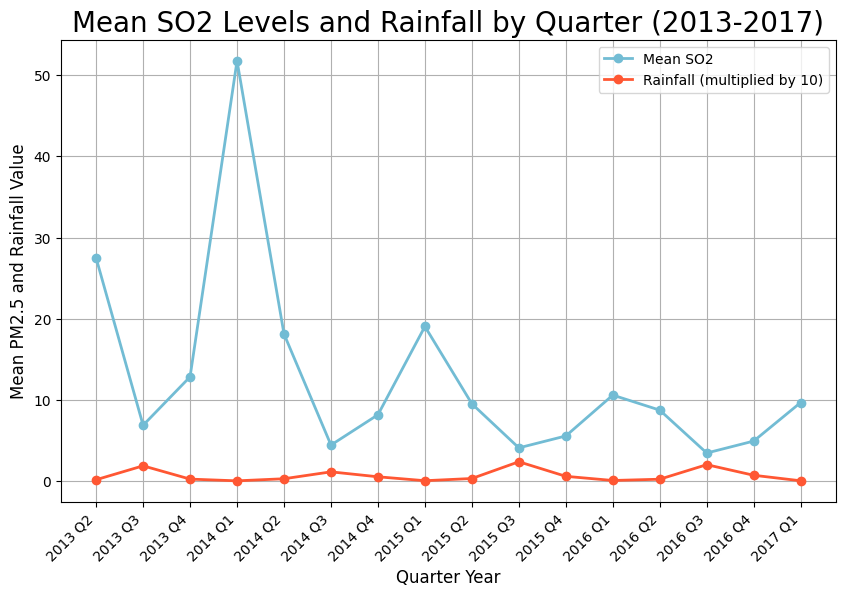

In [111]:
plt.figure(figsize=(10, 8))
# PM SO2
quarter_so2_df = huairou_df.groupby(['year', 'quarter'])['SO2'].mean()

# Hapus 2013 Q1, dan 2017 Q2 Q3 dan Q4 karena tidak memiliki value
has_data_quarter = quarter_so2_df.dropna()
years = has_data_quarter.index.get_level_values('year').unique()
quarters = ['Q1', 'Q2', 'Q3', 'Q4'] 

# Memastikan x labels hanya berupa label yang ada (menghilangan nilai yang NA)
x_labels = [f"{year} {quarter}" for year in years for quarter in quarters if (year, quarter) in has_data_quarter.index]

plt.figure(figsize=(10, 6))
plt.plot(
    x_labels, 
    has_data_quarter.values.flatten(), 
    marker='o', 
    linewidth=2, 
    color="#72BCD4",
    label="Mean SO2")

# Agar bisa lebih melihat perbandingan curah hujan dengan PM2.5,
# seluruh nilai curah hujan dikali 10
huairou_df_copy = huairou_df.copy()
huairou_df_copy['RAIN'] *= 10

quarter_rain_df = huairou_df_copy.groupby(['year', 'quarter'])['RAIN'].mean()
has_data_quarter_rain = quarter_rain_df.dropna() 

x_labels_rain = [f"{year} {quarter}" for year in years for quarter in quarters if (year, quarter) in has_data_quarter_rain.index]

plt.plot(
    x_labels_rain, 
    has_data_quarter_rain.values.flatten(), 
    marker='o', 
    linewidth=2, 
    color="#FF5733", 
    label="Rainfall (multiplied by 10)"
)

plt.title('Mean SO2 Levels and Rainfall by Quarter (2013-2017)', fontsize=20, loc='center')
plt.xlabel('Quarter Year', fontsize=12)
plt.ylabel('Mean PM2.5 and Rainfall Value', fontsize=12)
plt.xticks(range(len(x_labels)), x_labels, rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

## Conclusion

- Pada tahun **2013 Q4 ke 2014 Q1**, PM2.5 dan SO2 sama-sama mengalami lonjakan terbesar, sedangkan PM10 mengalami lonjakkan kedua terbesar (terbesar pertama untuk PM10 adalah pada 2016 Q1 ke 2016 Q2)

- **Terdapat korelasi** antara kadar SO2 dan curah hujan secara konsisten selama 2013-2017: Jika terjadi penurunan kadar SO2 dari satu quarter ke quarter berikutnya, maka curah hujan mengalami kenaikan. Sebaliknya, jika kadar SO2 mengalami peningkatan, curah hujan mengalami penurunan.

Data frame huairou yang sudah di cleaning di masukkan ke file baru main_data.csv untuk digunakan pada tahap berikut (pembuatan dashboard)

In [112]:
huairou_df.to_csv("main_data.csv", index=False)